In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('NY Realstate Pricing.csv')
df.head()

,F1,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242


# Data Preprocessing Part 1

In [3]:
df.select_dtypes(include='object').nunique()

neighbourhood    186
room_type          4
dtype: int64

In [4]:
df.shape

(17614, 12)

# Segment neighbourhood

In [5]:
df.neighbourhood.unique()

array(['Midtown', 'Brooklyn', 'Manhattan', 'Bedford-Stuyvesant',
       'Lower East Side', 'Park Slope', 'Williamsburg', 'East Village',
       'Harlem', 'Hamilton Heights', 'Bushwick', 'Alphabet City',
       'Flatbush', 'Long Island City', 'Clinton Hill', 'Fort Greene',
       'Upper West Side', 'Greenpoint', 'Kips Bay', "Hell's Kitchen",
       'East Harlem', 'Queens', 'Meatpacking District',
       'Brooklyn Heights', 'Prospect Heights', 'Chelsea',
       'Carroll Gardens', 'West Village', 'Gowanus', 'Lefferts Garden',
       'Flatlands', 'Kew Garden Hills', 'Upper East Side', 'Sunnyside',
       'DUMBO', 'Staten Island', 'Highbridge', 'Ridgewood', 'Jamaica',
       'Middle Village', 'Cobble Hill', 'Roosevelt Island', 'Soho',
       'West Brighton', 'Eastchester', 'Crown Heights',
       'Morningside Heights', 'Chinatown', 'Red Hook',
       'Kingsbridge Heights', 'The Rockaways', 'Midtown East',
       'Forest Hills', 'The Bronx', 'Washington Heights', 'Astoria',
       'Baycheste

In [6]:
# Define the conditions for each segment
manhattan = ['Midtown', 'Lower East Side', 'East Village', 'Harlem', 'Hamilton Heights', 'Alphabet City', 'Upper West Side', 'Kips Bay', "Hell's Kitchen", 'Upper East Side', 'Morningside Heights', 'Chinatown', 'Gramercy Park', 'Financial District', 'Flatiron District', 'Greenwich Village', 'Noho', 'Nolita', 'Tribeca', 'Times Square/Theatre District', 'Union Square']
brooklyn = ['Brooklyn', 'Bedford-Stuyvesant', 'Park Slope', 'Williamsburg', 'Bushwick', 'Flatbush', 'Clinton Hill', 'Fort Greene', 'Greenpoint', 'Carroll Gardens', 'Gowanus', 'Lefferts Garden', 'DUMBO', 'Brooklyn Heights', 'Prospect Heights', 'Cobble Hill', 'Red Hook', 'Bay Ridge', 'Boerum Hill', 'Borough Park', 'Canarsie', 'Columbia Street Waterfront', 'Downtown Brooklyn', 'Dyker Heights', 'Gravesend', 'Sunset Park', 'Bath Beach', 'Bergen Beach', 'Mill Basin']
queens = ['Long Island City', 'Queens', 'Sunnyside', 'Astoria', 'Forest Hills', 'Jackson Heights', 'Kew Garden Hills', 'Elmhurst', 'Fresh Meadows', 'Glendale', 'Maspeth', 'Woodhaven', 'Ozone Park', 'Rego Park', 'Woodside', 'Whitestone']
bronx = ['The Bronx', 'Highbridge', 'Kingsbridge Heights', 'Riverdale', 'The Rockaways', 'Morris Heights', 'Morris Park', 'Mott Haven', 'Concourse', 'Concourse Village', 'Country Club', 'Eastchester', 'East Tremont', 'Fordham', 'Hunts Point', 'Longwood', 'Melrose', 'Mount Eden', 'Norwood', 'Spuyten Duyvil', 'University Heights', 'Van Nest', 'Claremont', 'Bedford Park', 'Bronxdale']
staten_island = ['Staten Island', 'West Brighton', 'Rosebank', 'Stapleton', 'Great Kills', 'Mariners Harbor', 'Randall Manor']

# Define a function that returns the segment based on the neighbourhood
def segment_neighborhood(neighbourhood):
    if neighbourhood in manhattan:
        return 'Manhattan'
    elif neighbourhood in brooklyn:
        return 'Brooklyn'
    elif neighbourhood in queens:
        return 'Queens'
    elif neighbourhood in bronx:
        return 'Bronx'
    elif neighbourhood in staten_island:
        return 'Staten Island'
    else:
        return 'Other'

In [7]:
df['neighbourhood'] = df['neighbourhood'].apply(segment_neighborhood)

<AxesSubplot:>

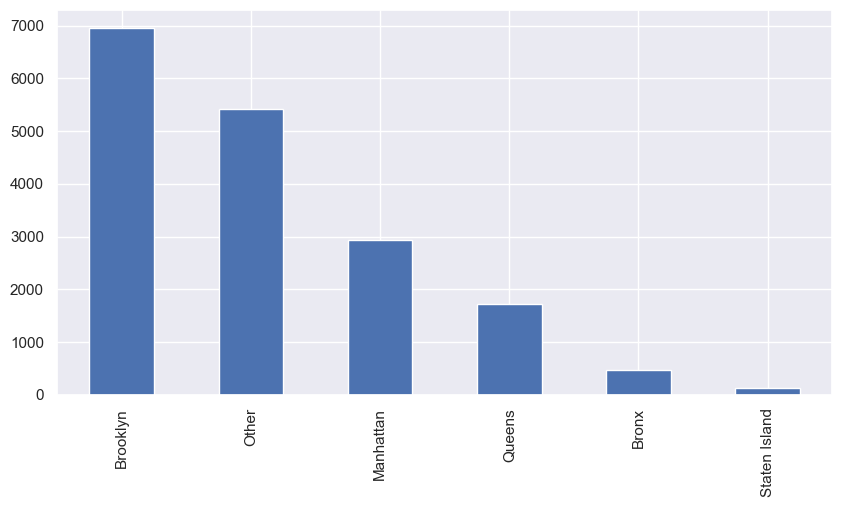

In [8]:
plt.figure(figsize=(10,5))
df['neighbourhood'].value_counts().plot(kind='bar')

# Drop langitude, latitude, F1, id because its unnecesary

In [9]:
df.drop(columns=['latitude', 'longitude', 'F1', 'id'], inplace=True)
df.shape

(17614, 8)

In [10]:
df.head()

,neighbourhood,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,Manhattan,Entire home/apt,225,15,10,48,0.39,1
1,Brooklyn,Entire home/apt,89,188,1,295,4.67,1
2,Other,Entire home/apt,200,362,3,78,0.60,19
3,Brooklyn,Private room,60,0,29,49,0.38,365
4,Other,Private room,79,141,2,454,3.52,242


# Exploratory Data Analysis

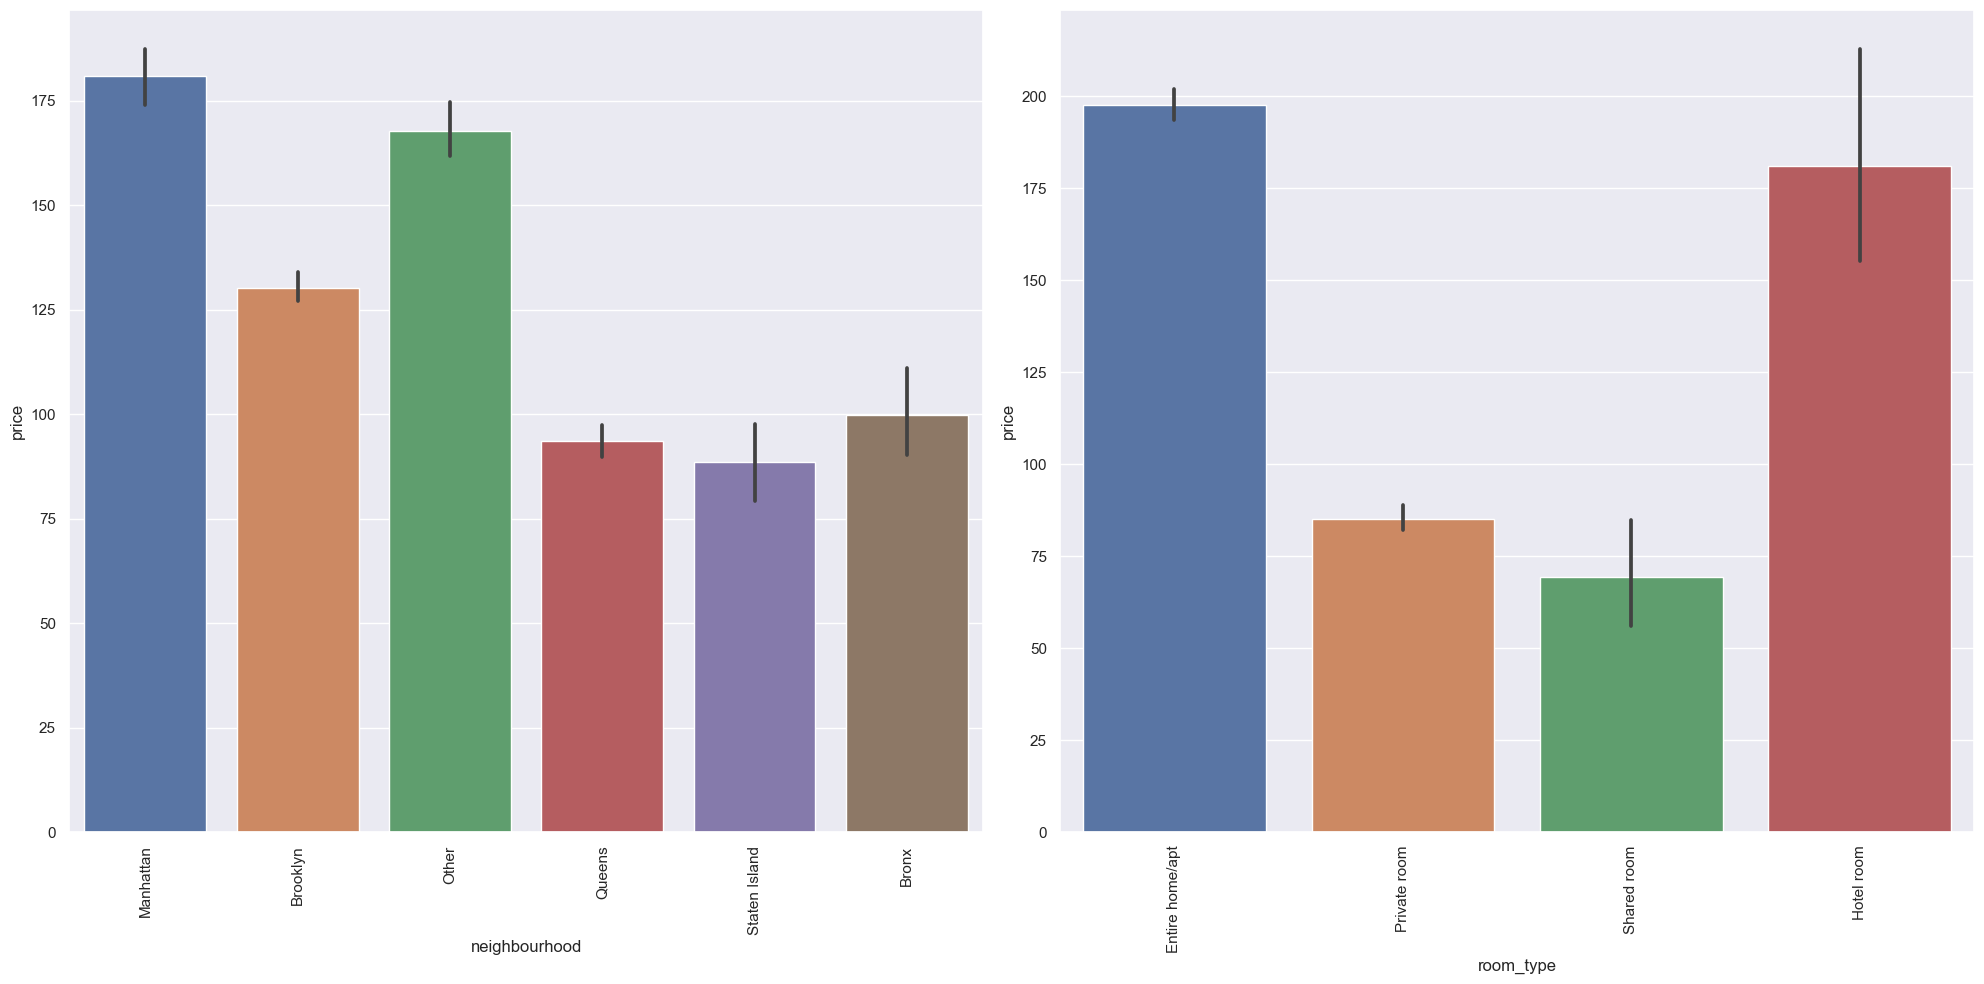

In [11]:
# list of categorical variables to plot
cat_vars = ['neighbourhood', 'room_type']

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='price', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

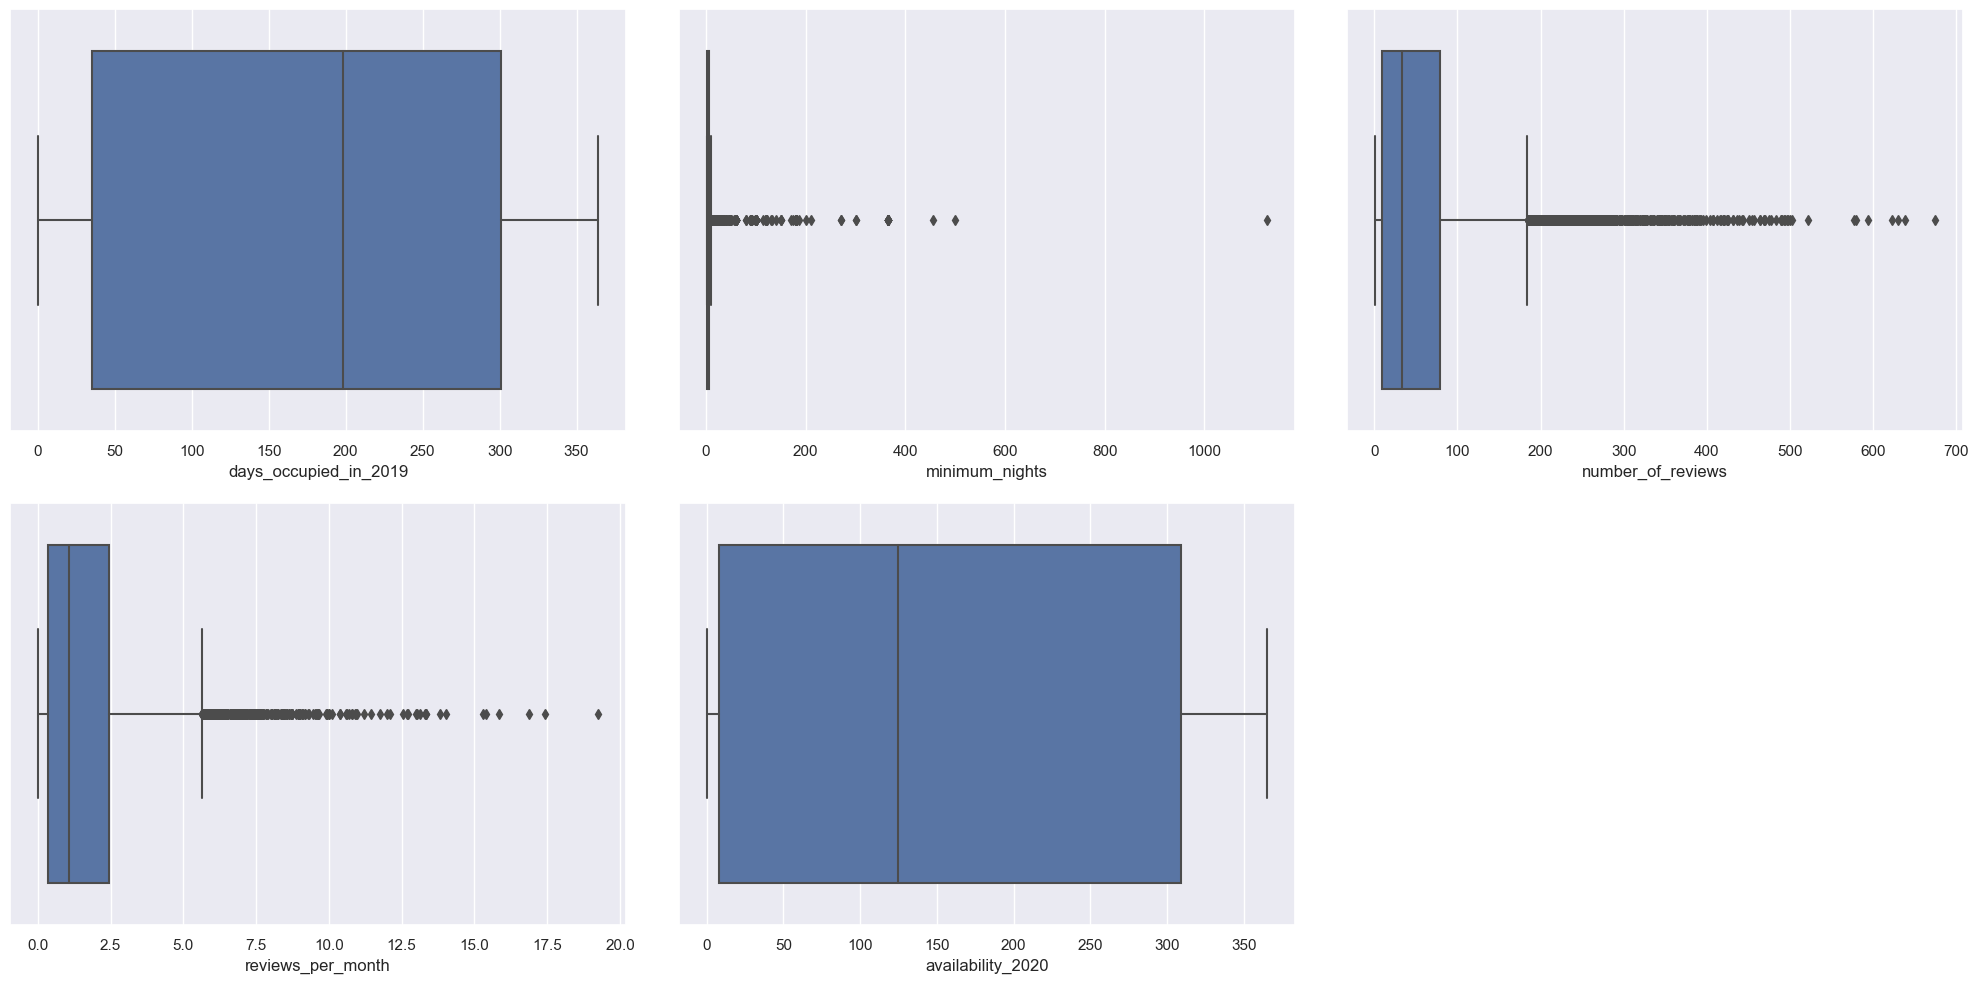

In [12]:
num_vars = ['days_occupied_in_2019', 'minimum_nights', 
           'number_of_reviews', 'reviews_per_month', 'availability_2020']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

#Show the boxplot
for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

# adjust spacing between subplots
fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

plt.show()

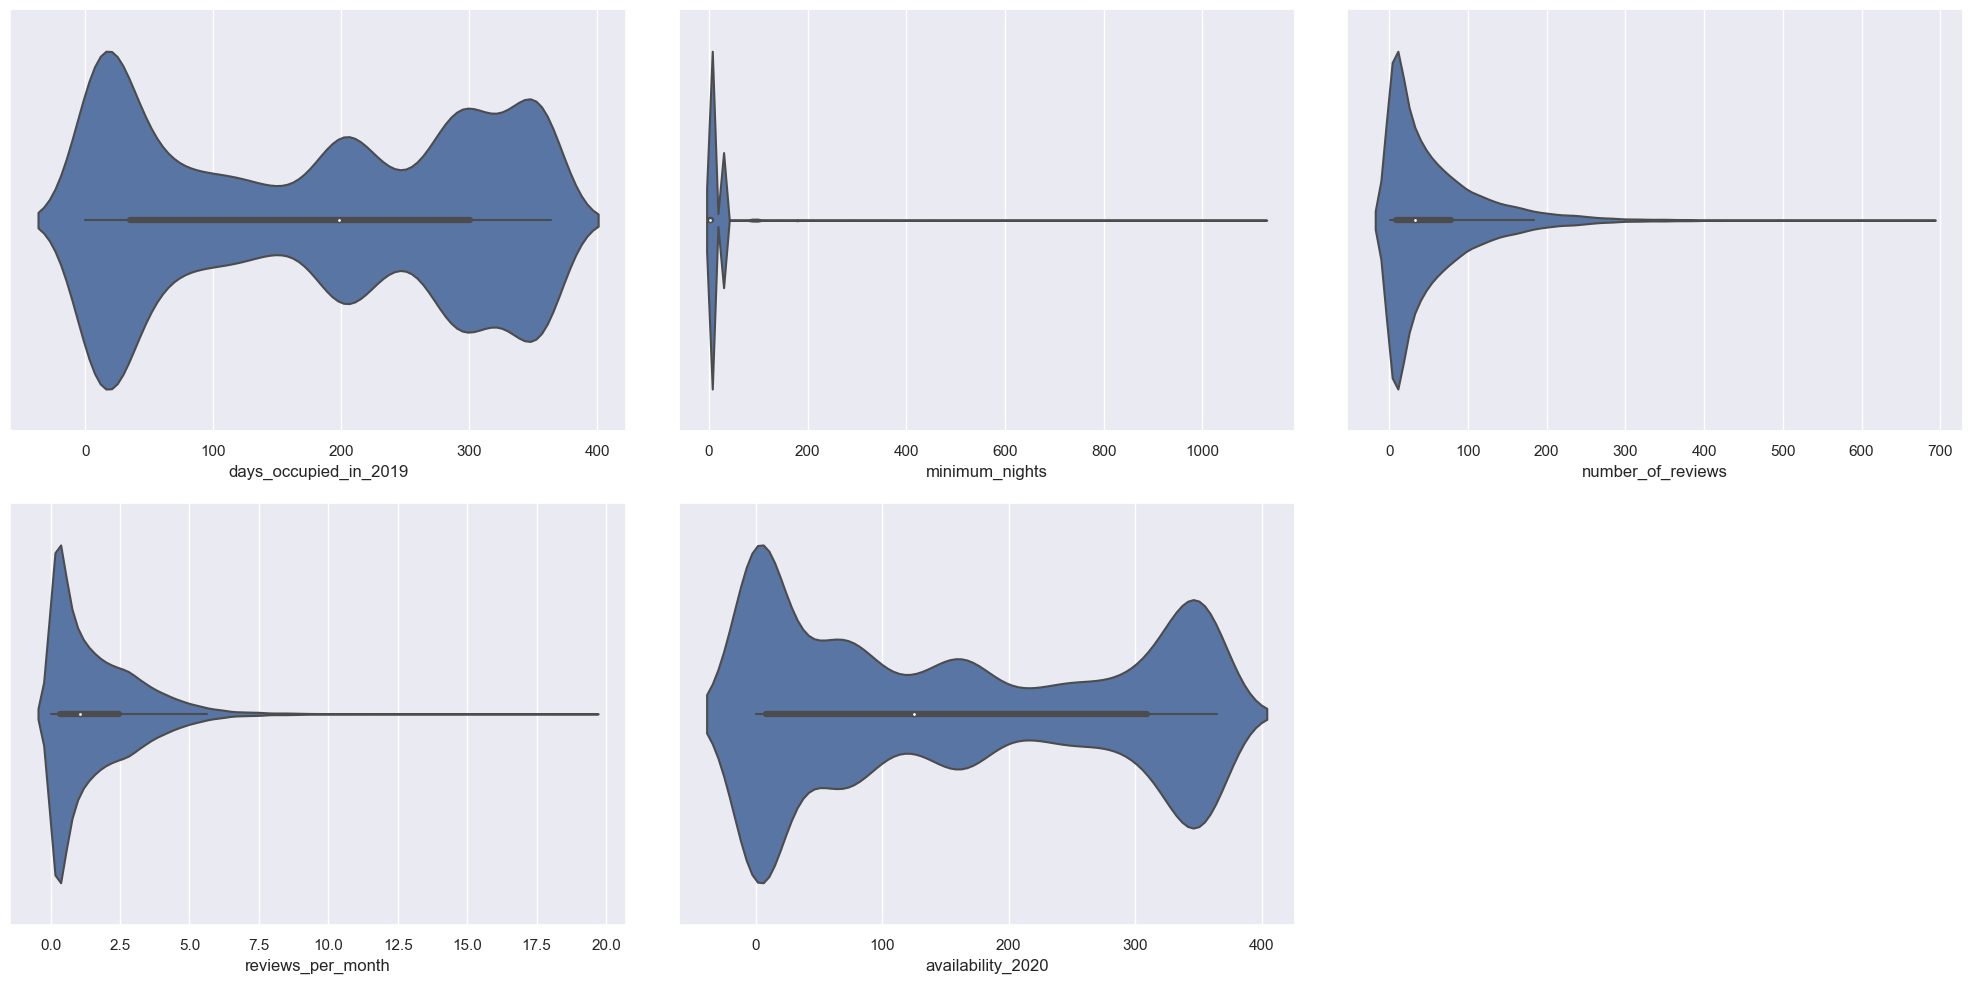

In [13]:
num_vars = ['days_occupied_in_2019', 'minimum_nights', 
           'number_of_reviews', 'reviews_per_month', 'availability_2020']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

plt.show()

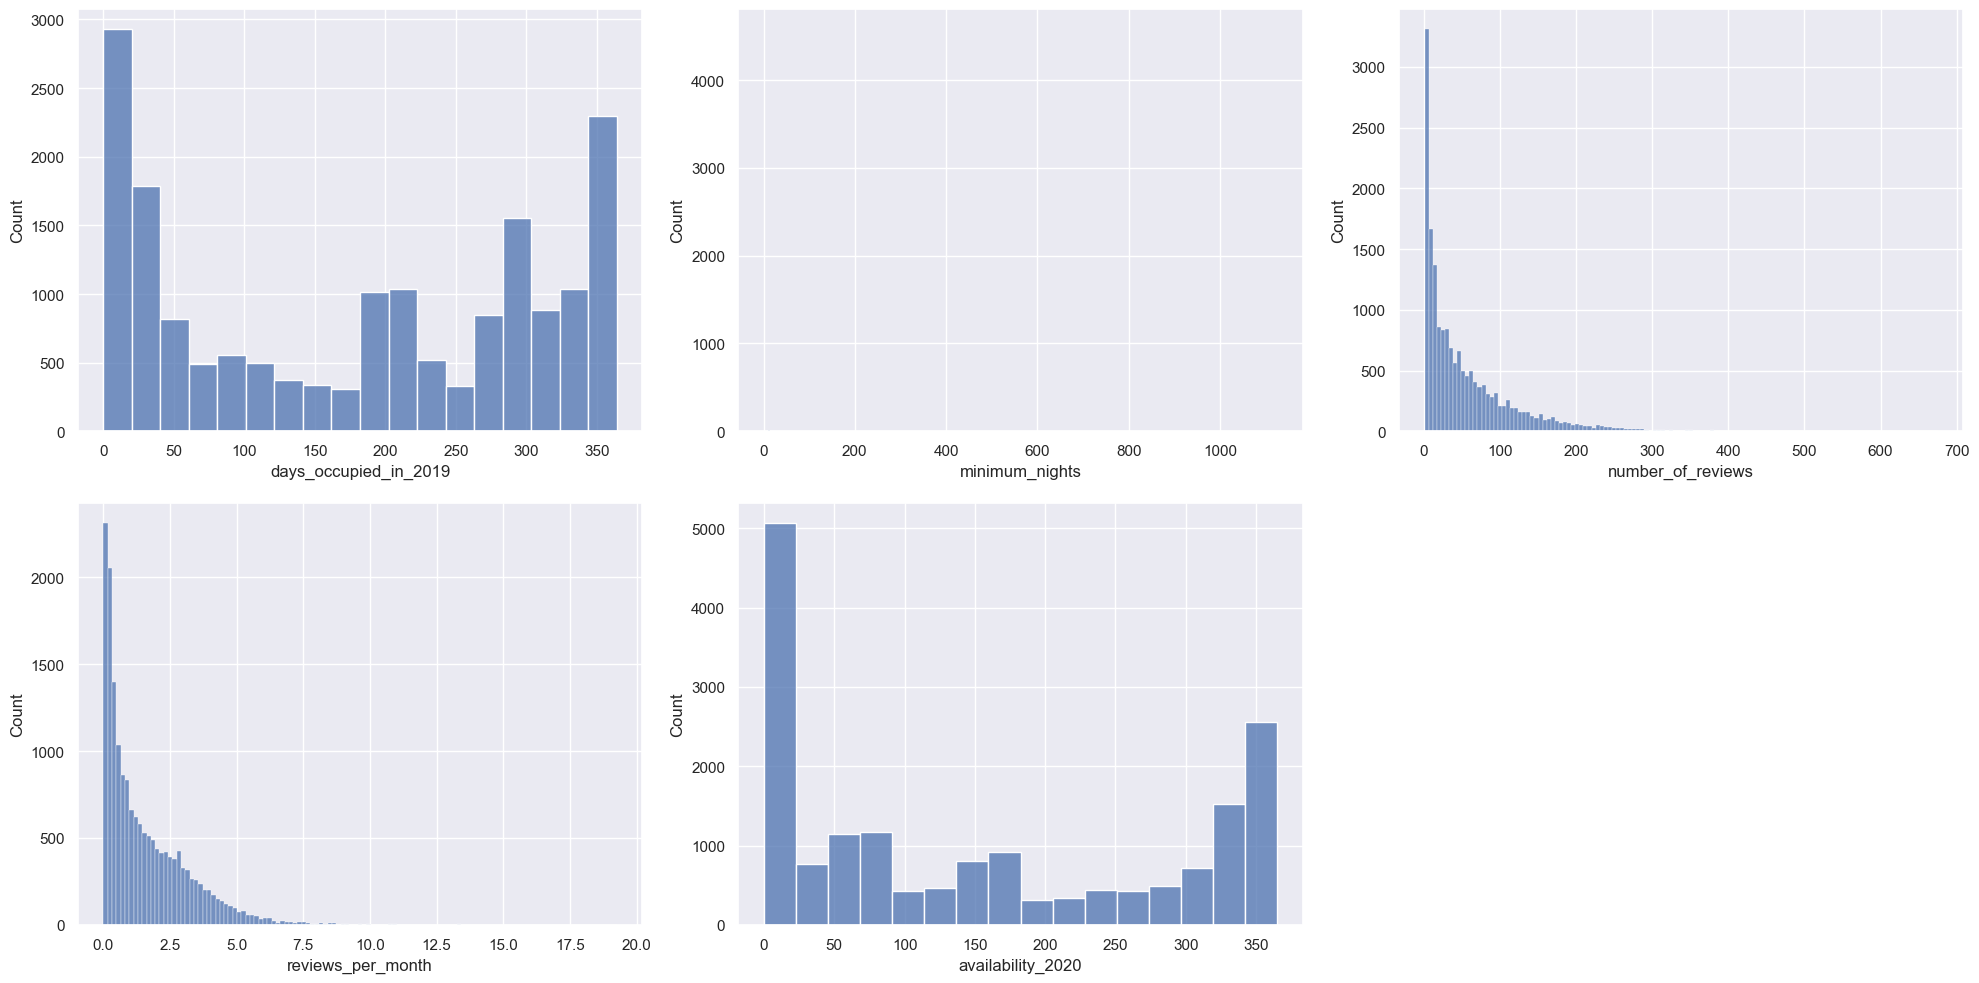

In [14]:
num_vars = ['days_occupied_in_2019', 'minimum_nights', 
           'number_of_reviews', 'reviews_per_month', 'availability_2020']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

plt.show()

# Data Preprocessing Part 2

In [16]:
#Check the missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Label encoding for every object (string) datatypes

In [17]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

neighbourhood: ['Manhattan' 'Brooklyn' 'Other' 'Queens' 'Staten Island' 'Bronx']
room_type: ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


In [18]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

neighbourhood: [2 1 3 4 5 0]
room_type: [0 2 3 1]


# Remove Outlier using IQR Method because there are alot of extreme value

In [19]:
df.shape

(17614, 8)

In [20]:
# specify the columns to remove outliers from dataframe
column_names = ['minimum_nights', 'number_of_reviews', 'reviews_per_month']

# remove outliers for each selected column using the IQR method
for column_name in column_names:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))]

df.head()

,neighbourhood,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
2,3,0,200,362,3,78,0.60,19
5,2,0,150,86,1,161,1.29,1
7,1,2,89,12,4,175,1.35,0
9,1,0,140,319,2,170,1.33,0
11,1,0,99,172,3,75,4.43,63


In [21]:
df.shape

(13869, 8)

# Heatmap Correlation

<AxesSubplot:>

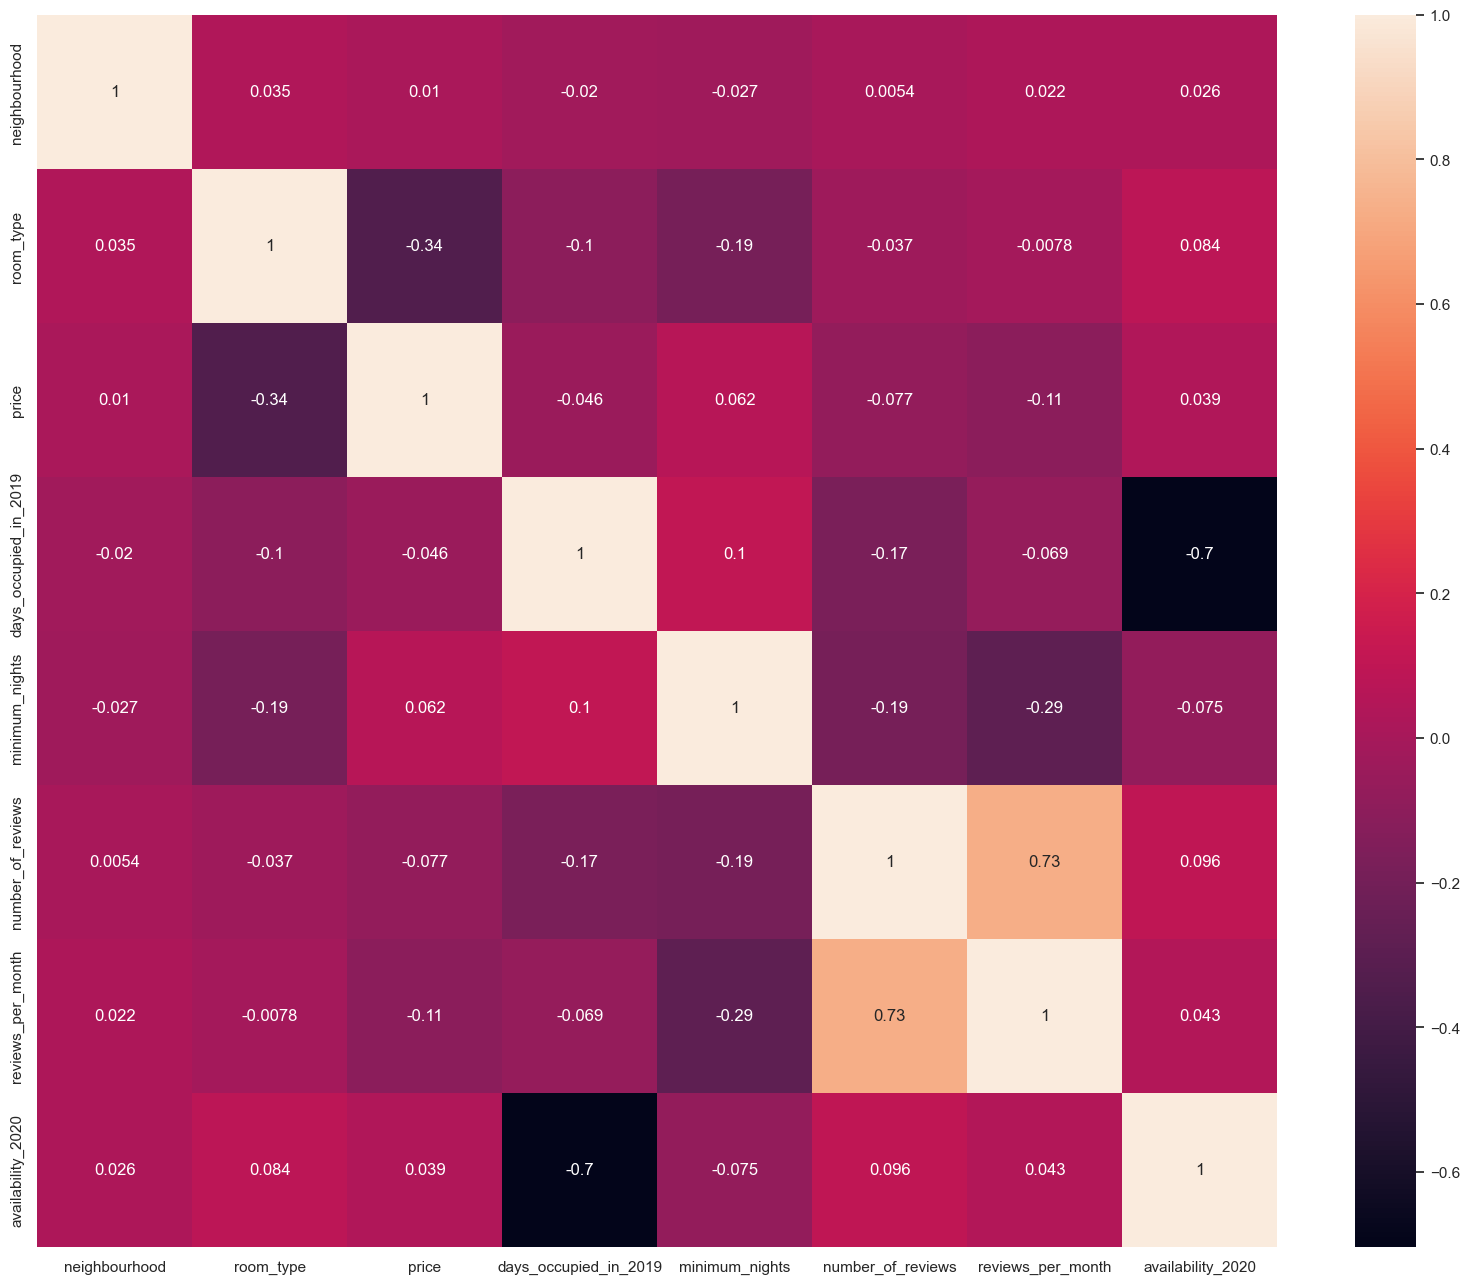

In [22]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [23]:
X = df.drop('price', axis=1)
y = df['price']

In [24]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 7, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [31]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42, max_depth=6, max_features='sqrt', min_samples_leaf=4, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=4,
                      random_state=42)

In [32]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 65.02717834642763
MAPE is 120169134399517.16
MSE is 25825.166947072736
R2 score is 0.08428811422241911
RMSE score is 160.70210623097861


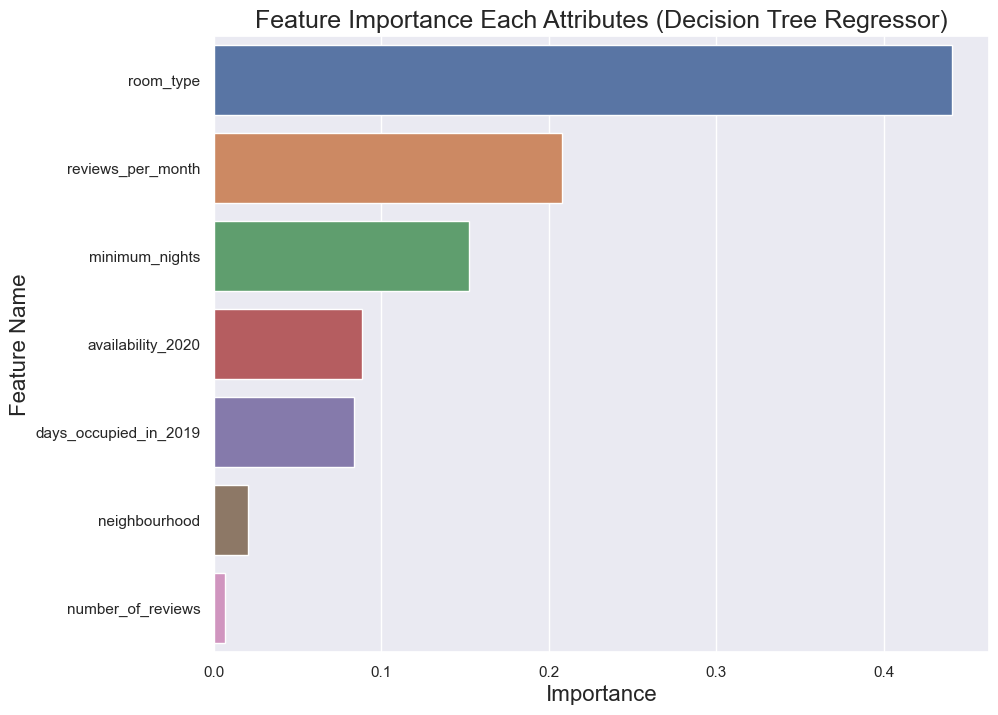

In [33]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

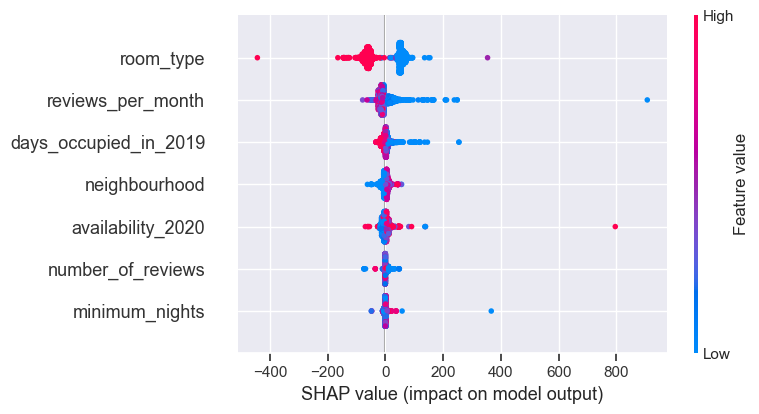

In [34]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

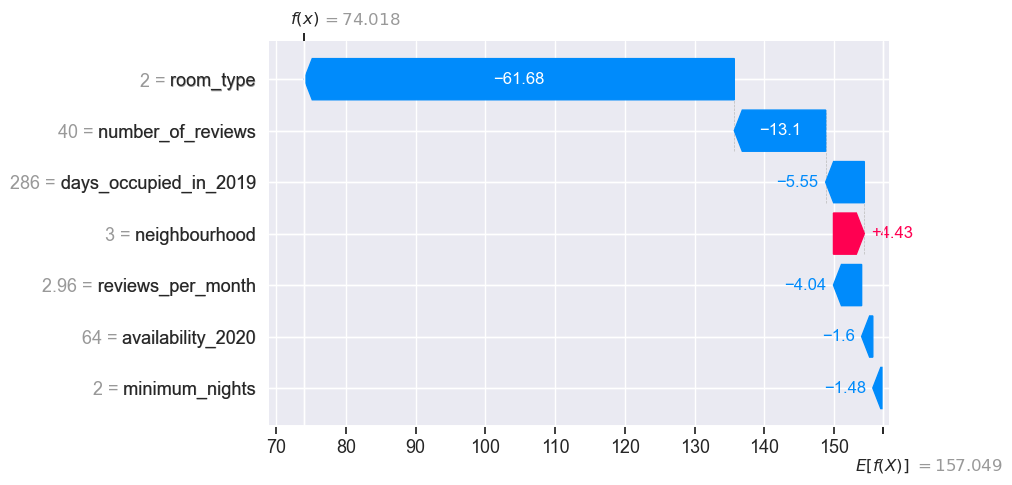

In [35]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

# Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=7, max_depth=9, min_samples_split=10, min_samples_leaf=4, 
                           max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, random_state=7)

In [47]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 60.26318457801803
MAPE is 122391281353646.72
MSE is 21757.986706140247
R2 score is 0.22850268196769208
RMSE score is 147.505887021977


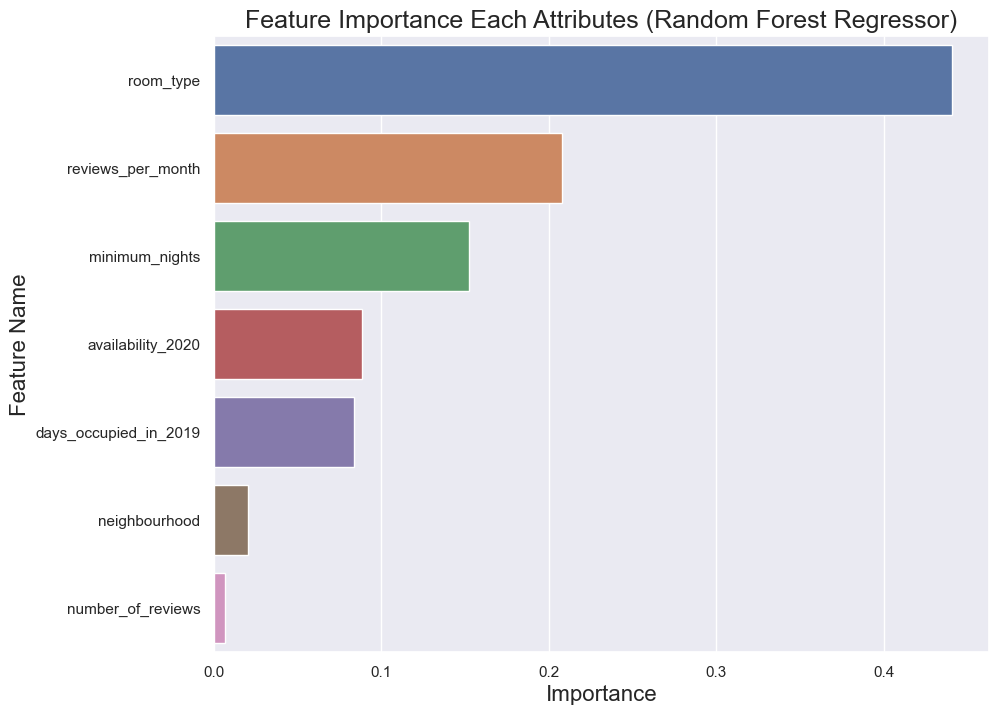

In [48]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

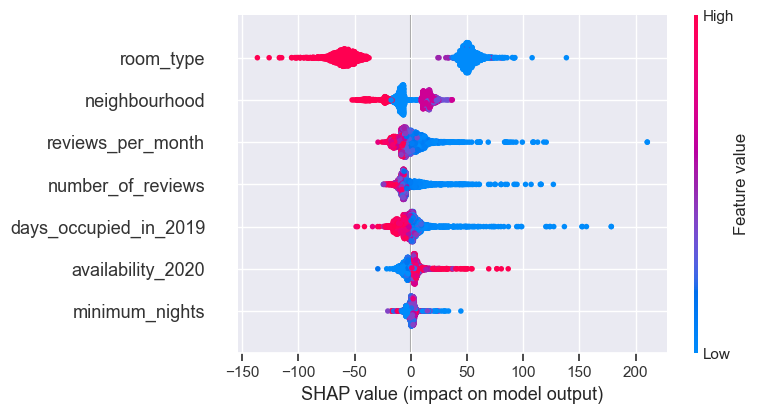

In [49]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

 98%|===================| 2714/2774 [00:27<00:00]        

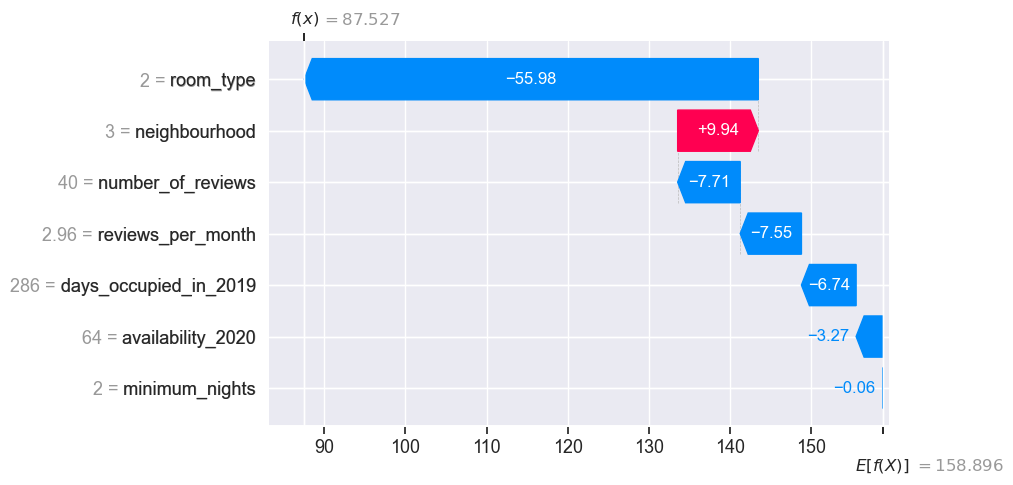

In [50]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

# AdaBoost Regressor

In [52]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Create an AdaBoost Regressor object
ada = AdaBoostRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1],
    'loss': ['linear', 'square', 'exponential']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 100}


In [57]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=42, n_estimators=100, learning_rate=0.01, loss='square')
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01, loss='square', n_estimators=100,
                  random_state=42)

In [58]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = ada.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 64.92371397727315
MAPE is 130783676809399.78
MSE is 24180.319703229026
R2 score is 0.14261130626849827
RMSE score is 155.50022412597684


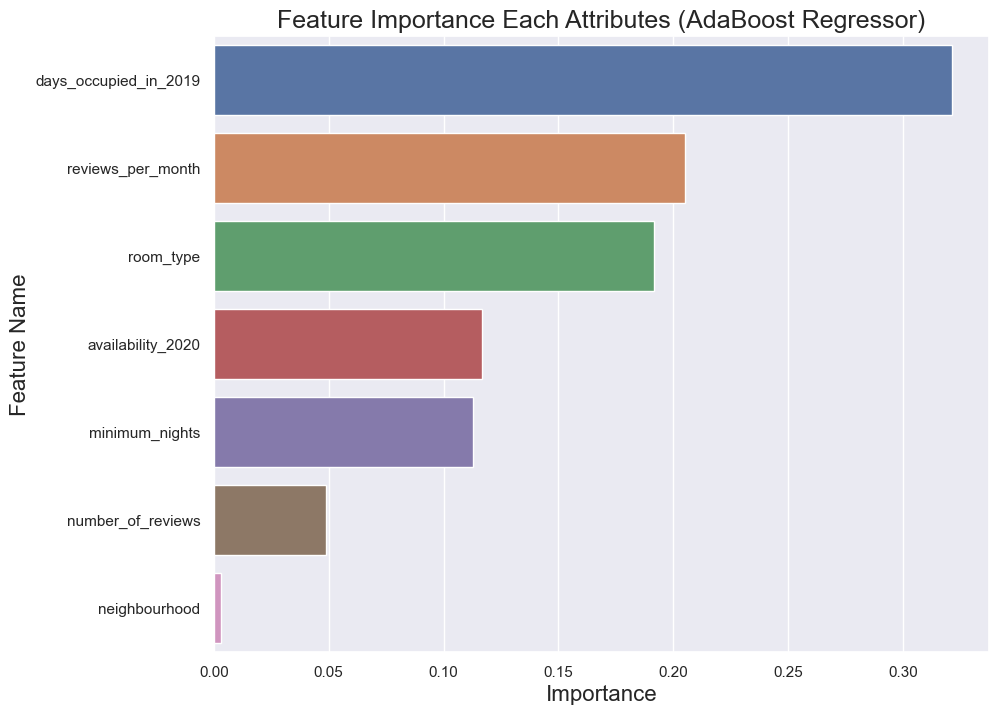

In [59]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (AdaBoost Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()